In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.replace({"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3},inplace=True)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [6]:
data['Species'].unique()

array([1, 2, 3], dtype=int64)

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [9]:
data['Species'].value_counts()

1    50
2    50
3    50
Name: Species, dtype: int64

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

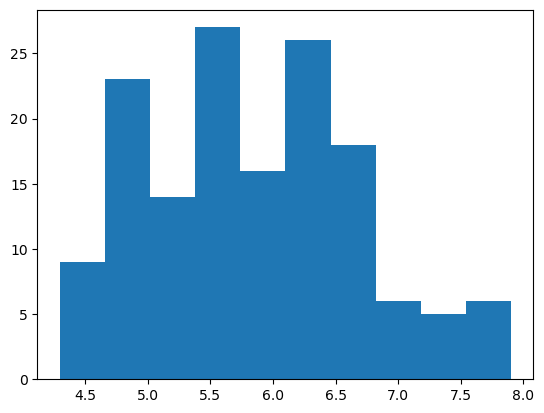

In [11]:
plt.hist(data['SepalLengthCm'])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

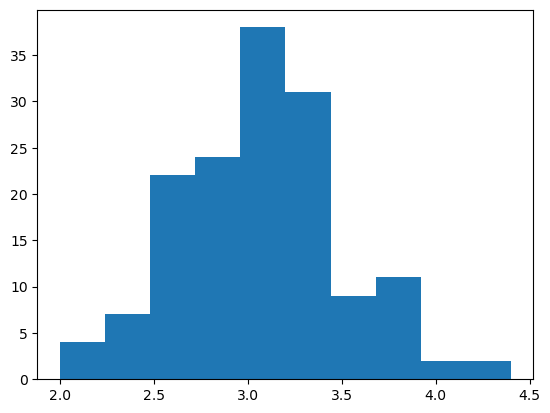

In [12]:
plt.hist(data['SepalWidthCm'])

S:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

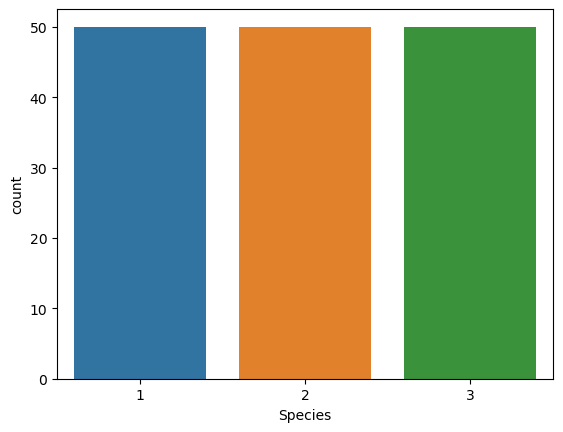

In [13]:
sns.countplot(data['Species'])

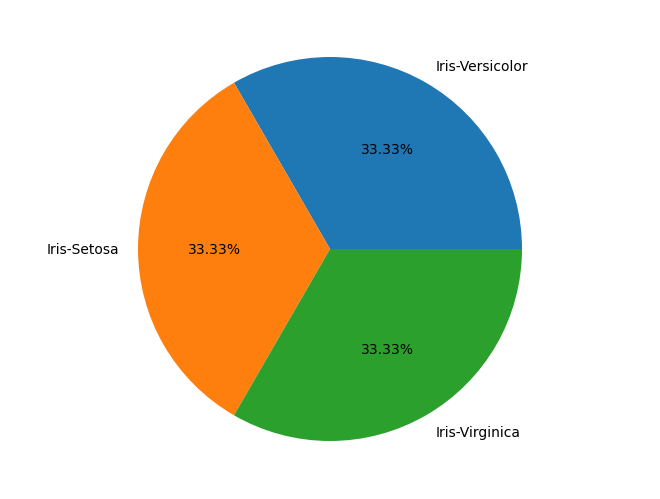

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

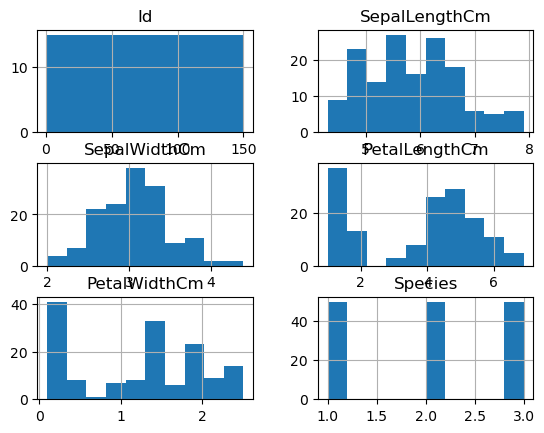

In [15]:
data.hist()
plt.show()

In [16]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

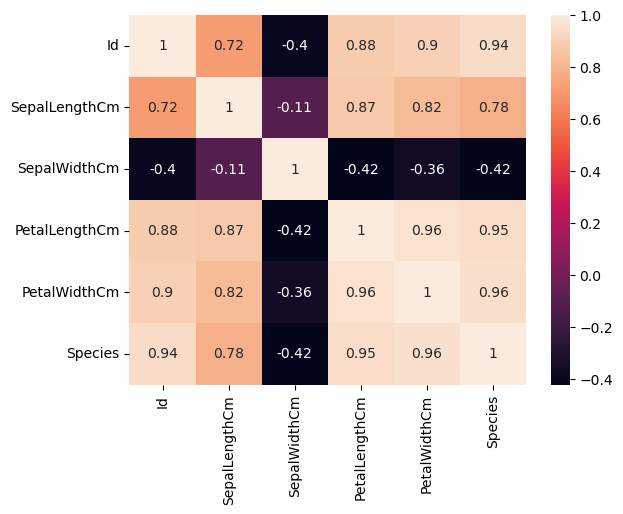

In [17]:
sns.heatmap(data.corr(),annot=True)

In [18]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
X = data.iloc[:,1:-1]

In [20]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [21]:
Y = data.iloc[:,-1]

In [22]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [24]:
print(X_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
54             6.5           2.8            4.6           1.5
108            6.7           2.5            5.8           1.8
112            6.8           3.0            5.5           2.1
17             5.1           3.5            1.4           0.3
119            6.0           2.2            5.0           1.5
..             ...           ...            ...           ...
133            6.3           2.8            5.1           1.5
137            6.4           3.1            5.5           1.8
72             6.3           2.5            4.9           1.5
140            6.7           3.1            5.6           2.4
37             4.9           3.1            1.5           0.1

[112 rows x 4 columns]


In [25]:
print(X_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
14             5.8           4.0            1.2           0.2
98             5.1           2.5            3.0           1.1
75             6.6           3.0            4.4           1.4
16             5.4           3.9            1.3           0.4
131            7.9           3.8            6.4           2.0
56             6.3           3.3            4.7           1.6
141            6.9           3.1            5.1           2.3
44             5.1           3.8            1.9           0.4
29             4.7           3.2            1.6           0.2
120            6.9           3.2            5.7           2.3
94             5.6           2.7            4.2           1.3
5              5.4           3.9            1.7           0.4
102            7.1           3.0            5.9           2.1
51             6.4           3.2            4.5           1.5
78             6.0           2.9            4.5           1.5
42      

In [26]:
print(Y_train)

54     2
108    3
112    3
17     1
119    3
      ..
133    3
137    3
72     2
140    3
37     1
Name: Species, Length: 112, dtype: int64


In [27]:
print(Y_test)

14     1
98     2
75     2
16     1
131    3
56     2
141    3
44     1
29     1
120    3
94     2
5      1
102    3
51     2
78     2
42     1
92     2
66     2
31     1
35     1
90     2
84     2
77     2
40     1
125    3
99     2
33     1
19     1
73     2
146    3
91     2
135    3
69     2
128    3
114    3
48     1
53     2
28     1
Name: Species, dtype: int64


In [28]:
#importing logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression
#Model creation
model_logistic=LogisticRegression()
#training the data using fit method
model_logistic.fit(X_train,Y_train)

LogisticRegression()

In [29]:
#prediction using logistic regression
y_logistic_pred=model_logistic.predict(X_test)
#predicted y
y_logistic_pred

array([1, 2, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       3, 1, 3, 2, 1, 1, 2, 3, 2, 3, 2, 3, 3, 1, 2, 1], dtype=int64)

In [30]:
#importing accuracy score from sklearn metrics
from sklearn.metrics import accuracy_score
#accuracy score using logistic regression
accuracy_logistic=accuracy_score(Y_test,y_logistic_pred)

In [31]:
accuracy_logistic

0.9736842105263158